In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>Data Discription</h1>
The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)
    
The training set should be used to build your machine learning models. *Train.csv* dataset have 891 Passengers Information including their names, ticket information, and whether they survived or not.

Like *Train.csv*, there is another dataset named *test.csv* that have 418 passengers infromation but not include that a passenger is survived or not. This data set hide survived information because this dataset is used for testing after creating prediction model using *Train.csv*.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
filename = '/kaggle/input/titanic/train.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Description of Columns**

1. PassengerId: Unique IDs for passengers.
2. Survived: Survival status (1 = survived, 0 = died).
3. Pclass: Passenger class (1, 2, 3).
4. Name: Passenger names.
5. Sex: Gender (male, female).
6. Age: Passenger ages.
7. SibSp: Number of siblings/spouses aboard.
8. Parch: Number of parents/children aboard.
9. Ticket: Ticket numbers.
10. Fare: Fare paid.
11. Cabin: Cabin numbers.
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h2>Column Type</h2>

- PassengerId -> Numerical
- Survived -> Numerical
- Pclass -> Categorical
- Name -> Mixed
- Sex -> Categorical
- Age -> Numerical 
- SibSp -> Categorical
- Parch -> Categorical 
- Ticket -> Mixed
- Fare -> Numerical 
- Cabin -> Mixed
- Embarked -> Categorical

# Univeriant Analysis

<h2>Age</h2>

**Conclusions**
- Age is normaly(almost) distributed
- Age have some outlires
- 20% values of age is missing



In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

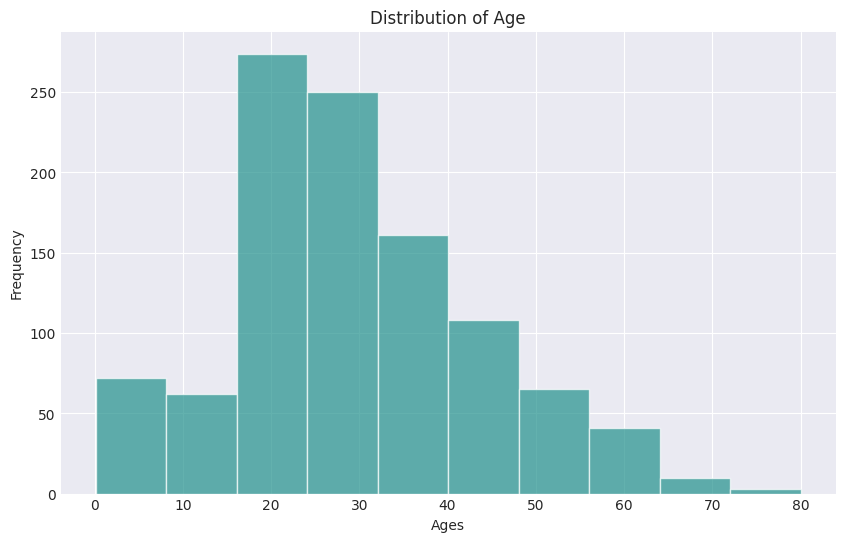

In [104]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', color=plt.cm.viridis(0.5), alpha=0.7)
plt.xlabel('Ages')
plt.title('Distribution of Age')
plt.show()

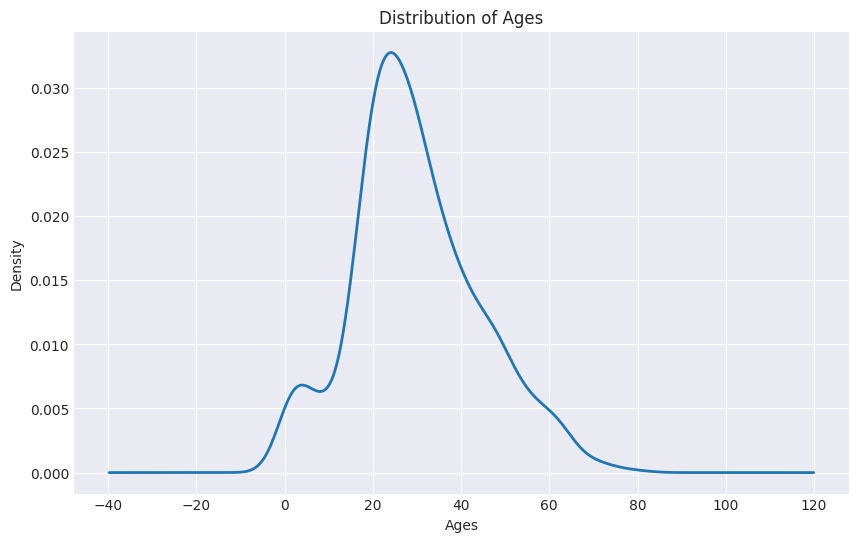

In [103]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='kde',color='#1f77b4', linewidth=2)
plt.xlabel('Ages')
plt.title('Distribution of Ages')
plt.show()

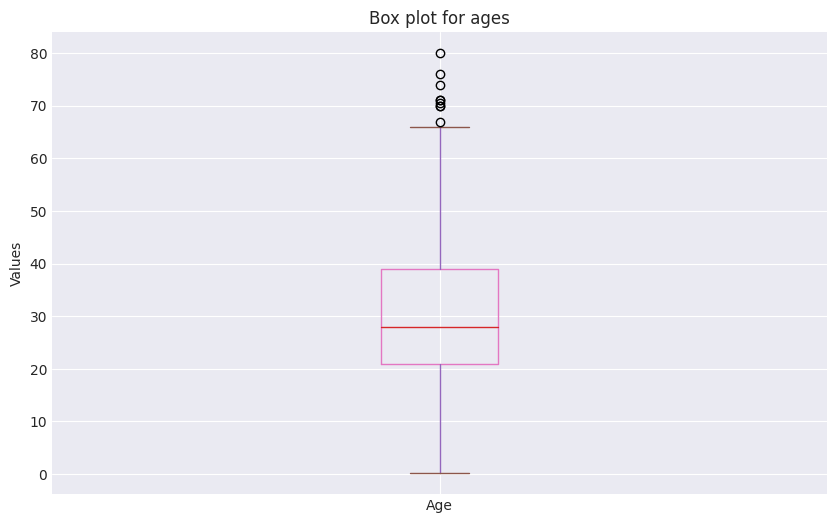

In [102]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='box',color={'whiskers': '#9467bd', 'caps': '#8c564b', 'boxes': '#e377c2', 'medians': '#d62728'})
plt.title('Box plot for ages')
plt.ylabel('Values')
plt.show()

In [11]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [12]:
df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

<h2>Fare</h2>

**Conclusions**
- This Data Highly (Positively) skewed.
- This Data 0% Missing Values.
- Fare col actualy contain the group fare not indivisual (That might be issue).


In [11]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

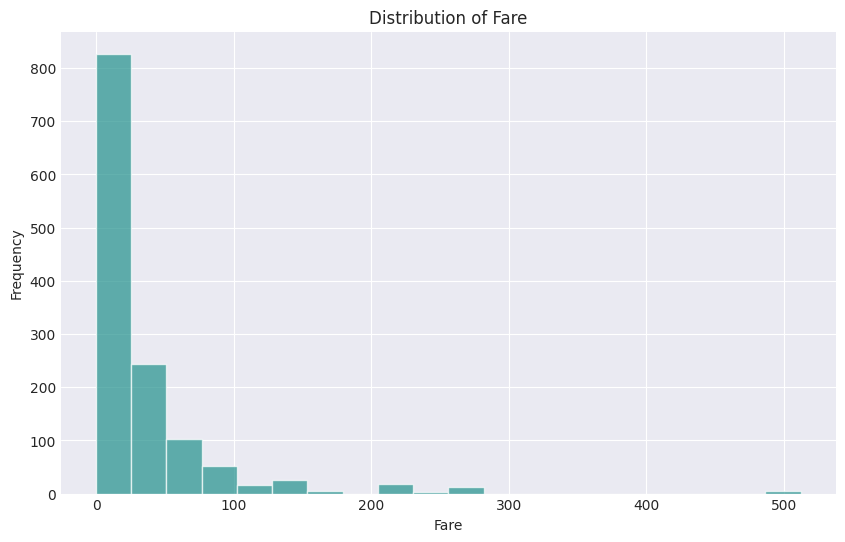

In [129]:
plt.figure(figsize=(10, 6))
df['Fare'].plot(kind='hist',bins=20,color=plt.cm.viridis(0.5), alpha=0.7)
plt.xlabel('Fare')
plt.title('Distribution of Fare')
plt.show()

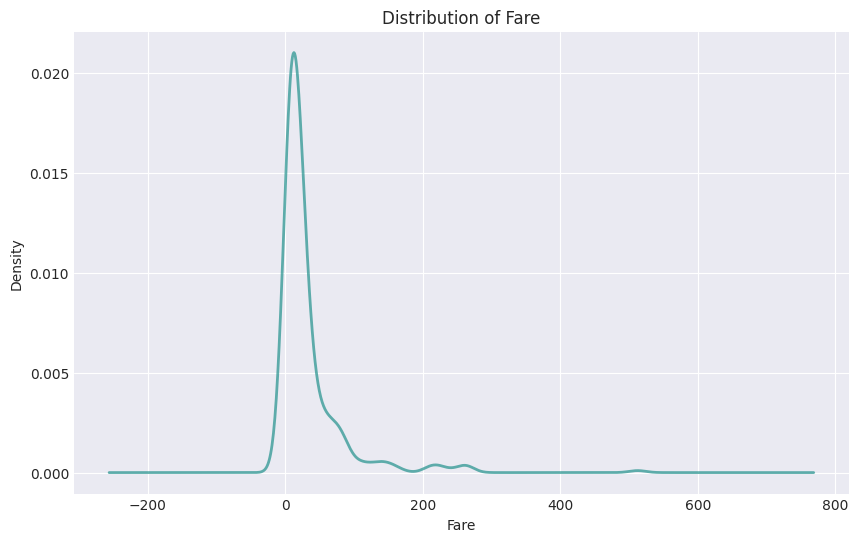

In [130]:
plt.figure(figsize=(10, 6))
df['Fare'].plot(kind='kde',color=plt.cm.viridis(0.5), alpha=0.7,linewidth=2)
plt.xlabel('Fare')
plt.title('Distribution of Fare')
plt.show()

In [18]:
df['Fare'].skew()

4.787316519674893

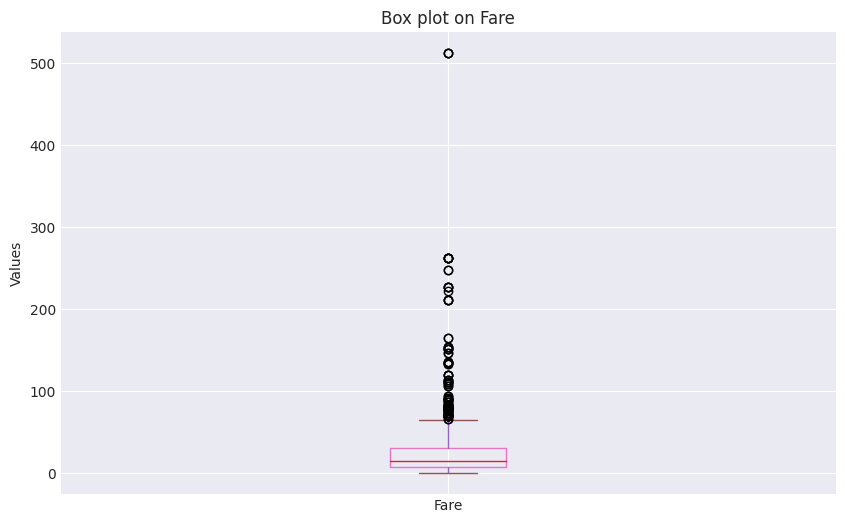

In [40]:
plt.figure(figsize=(10, 6))
df['Fare'].plot(kind='box',color={'whiskers': '#9467bd', 'caps': '#8c564b', 'boxes': '#e377c2', 'medians': '#d62728'})
plt.ylabel('Values')
plt.title('Box plot on Fare')
plt.show()

In [21]:
df[df['Fare'] > 270]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [17]:
df['Fare'].isnull().sum()

0

<h2>Survived</h2>
**Conclusions**
- Almost 60.6% peoples are died and 39.4% are saved.
- There are no missing values in this column.

In [25]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

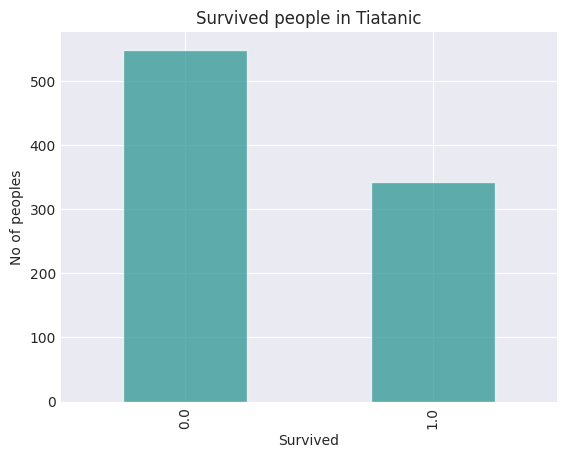

In [173]:
df['Survived'].value_counts().plot(kind='bar',color=plt.cm.viridis(0.5), alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Survived people in Tiatanic')
plt.show()

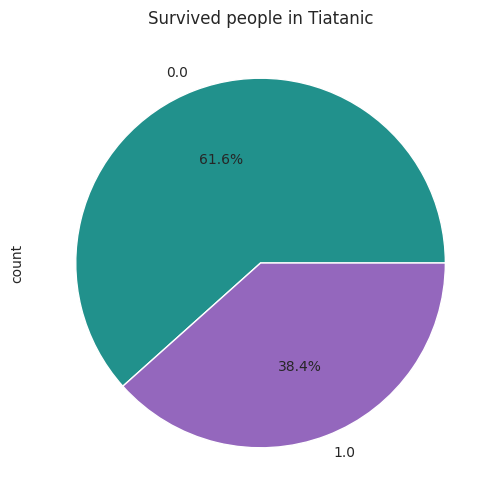

In [152]:
plt.figure(figsize=(10, 6))
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=[plt.cm.viridis(0.5),'#9467bd'])
plt.title('Survived people in Tiatanic')
plt.show()

In [28]:
df['Survived'].isnull().sum()

0

## Pclass
**Conclusion**
- No Missing values in this column
- 1 class have more cost and 2 class lower then 1 and 3 is lower cost then 1 and 2. But Surprisely Peoples in class 2 is lower then class 1. 

In [29]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

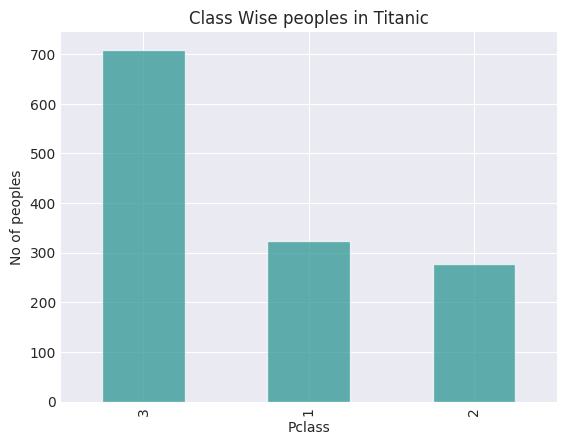

In [174]:
df['Pclass'].value_counts().plot(kind='bar',color=plt.cm.viridis(0.5), alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Class Wise peoples in Titanic')
plt.show()

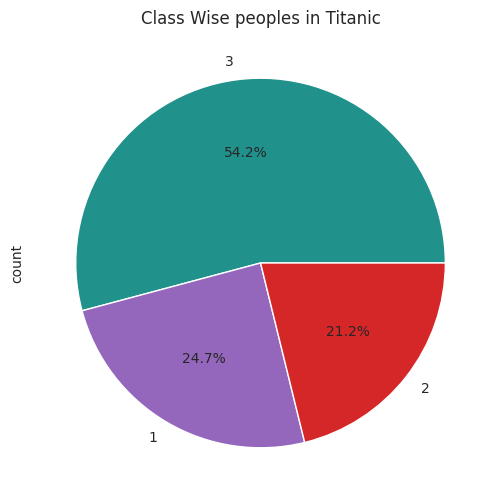

In [154]:
plt.figure(figsize=(10, 6))
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=[plt.cm.viridis(0.5),'#9467bd','#d62728'])
plt.title('Class Wise peoples in Titanic')
plt.show()

In [32]:
df['Pclass'].isnull().sum()

0

## Sex
**Conclusions**
- There is no missing values in this column.
- Number of Males are greater then Females. Its not surprise. Generally this sanrio is happned.

In [34]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

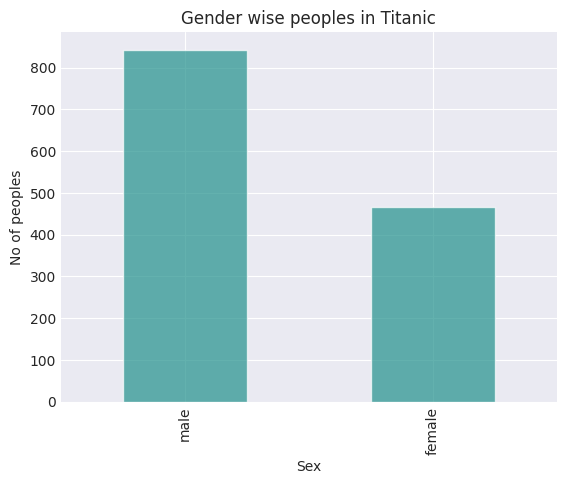

In [175]:
df['Sex'].value_counts().plot(kind='bar',color=plt.cm.viridis(0.5), alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Gender wise peoples in Titanic')
plt.show()

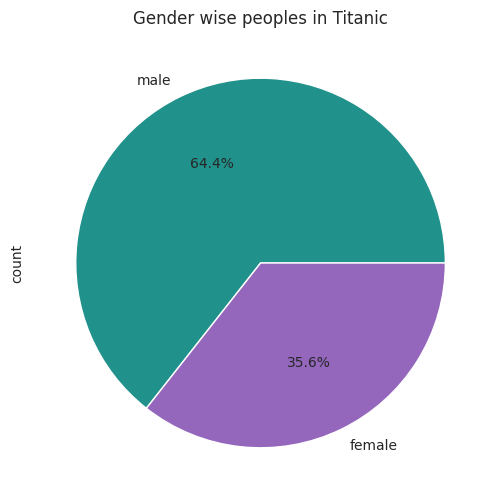

In [156]:
plt.figure(figsize=(10, 6))
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=[plt.cm.viridis(0.5),'#9467bd'])
plt.title('Gender wise peoples in Titanic')
plt.show()

In [37]:
df['Sex'].isnull().sum()

0

## SibSp & Parch
**Conclusions**
- We can create a family_size column rather then by merging two different columns SibSp and Parch
- We can create a column is_alone.
- There are no missing values in these columns.
- Max num of Passengers are travel alone.


In [38]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [41]:

df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

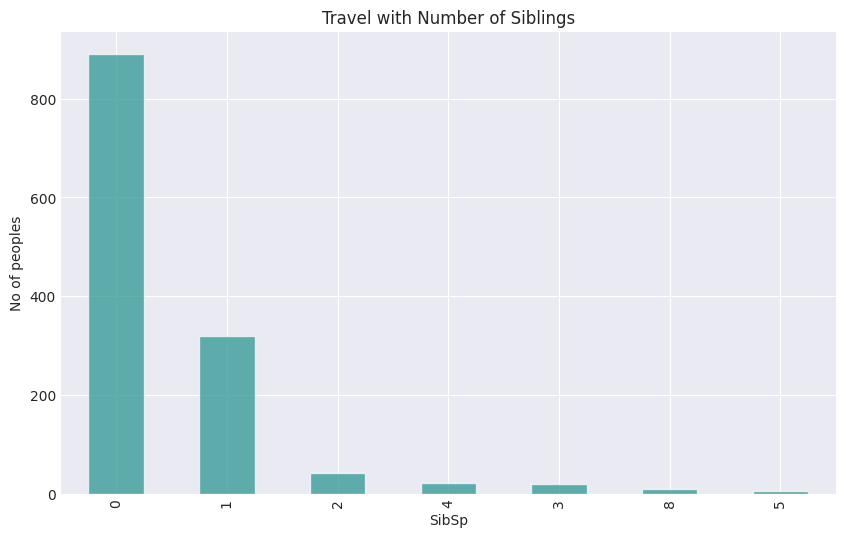

In [157]:
plt.figure(figsize=(10, 6))
df['SibSp'].value_counts().plot(kind='bar',color=plt.cm.viridis(0.5), alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Travel with Number of Siblings')
plt.show()

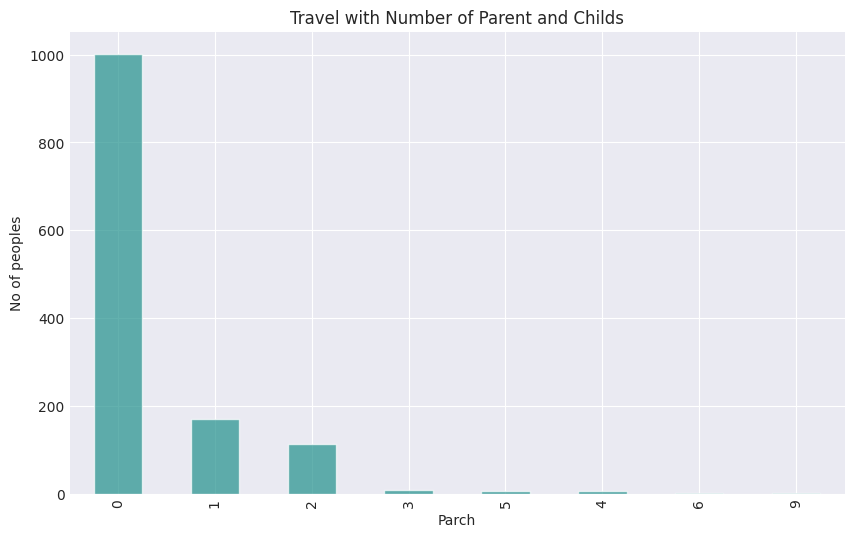

In [158]:
plt.figure(figsize=(10, 6))
df['Parch'].value_counts().plot(kind='bar',color=plt.cm.viridis(0.5), alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Travel with Number of Parent and Childs')
plt.show()

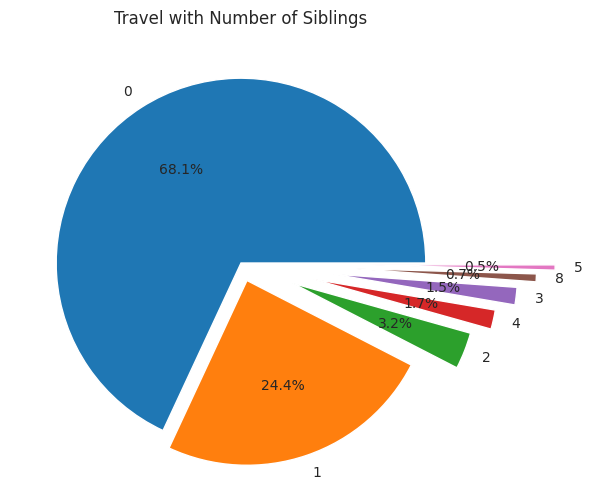

In [194]:
temp = df['SibSp'].value_counts()
explode = [0, 0.1, 0.3, 0.4, 0.5, 0.6,0.7]
plt.figure(figsize=(10, 6))
plt.pie(temp,labels=temp.index,explode=explode,autopct='%0.1f%%')
plt.title('Travel with Number of Siblings')
plt.show()

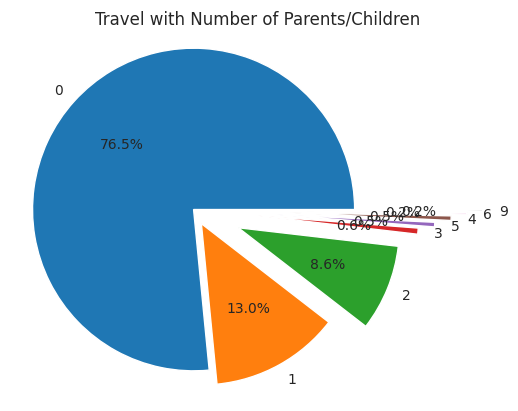

In [200]:
sibsp_counts = df['Parch'].value_counts()
sibsp_counts

explode = [0, 0.1, 0.3, 0.4, 0.5, 0.6,0.7,0.8]
plt.pie(sibsp_counts, labels=sibsp_counts.index, autopct='%0.1f%%', explode=explode)
plt.title("Travel with Number of Parents/Children")
plt.axis('equal')  
plt.show()

In [44]:
df['SibSp'].isnull().sum()

0

In [45]:
df['Parch'].isnull().sum()

0

## Embarked
**Conclusions**
- There are 2 missing values in this column.

In [47]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

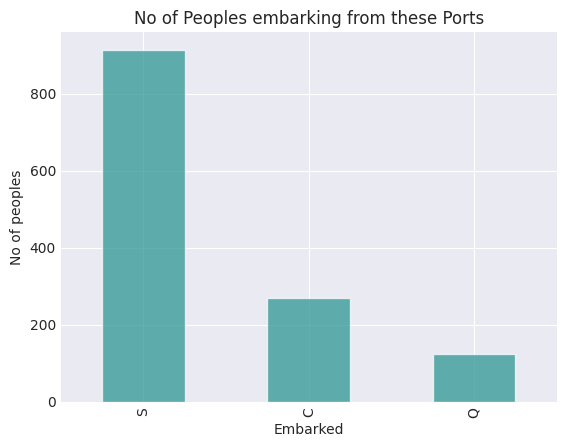

In [176]:
df['Embarked'].value_counts().plot(kind='bar',color=plt.cm.viridis(0.5), alpha=0.7)
plt.ylabel('No of peoples')
plt.title('No of Peoples embarking from these Ports')
plt.show()

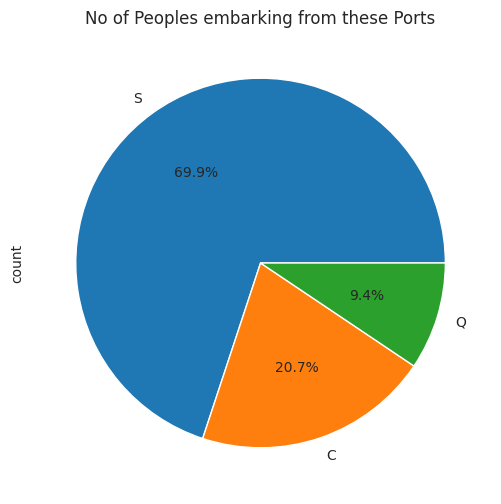

In [162]:
plt.figure(figsize=(10, 6))
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('No of Peoples embarking from these Ports')
plt.show()

In [53]:
df['Embarked'].isnull().sum()

2

# Bivariate Analysis

## Survived and Pclass
**Conclusions**
- Class 3 is more dangerouse because 75% peoples are deid who are in Class 3

In [59]:
survived_vs_pclass = pd.crosstab(df['Pclass'],df['Survived'],normalize='columns')*100
survived_vs_pclass

Survived,0,1
Pclass,,
1,14.571949,39.766082
2,17.668488,25.438596
3,67.759563,34.795322


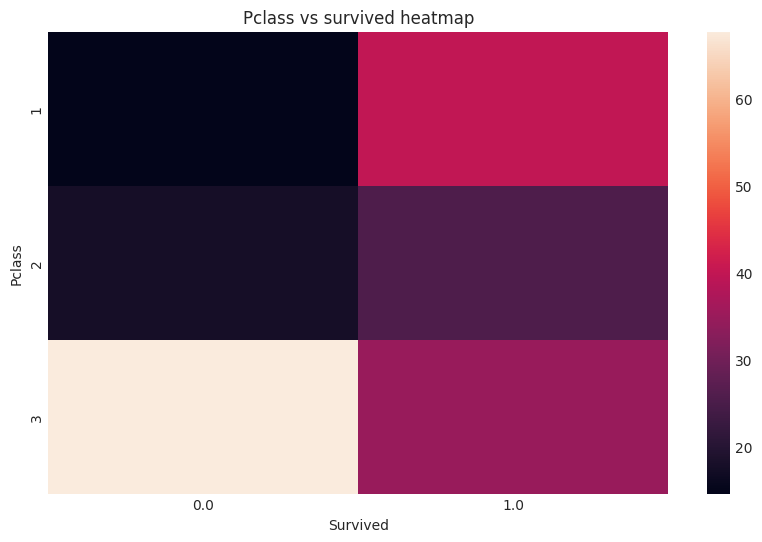

In [163]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived'],normalize='columns')*100)
plt.title('Pclass vs survived heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

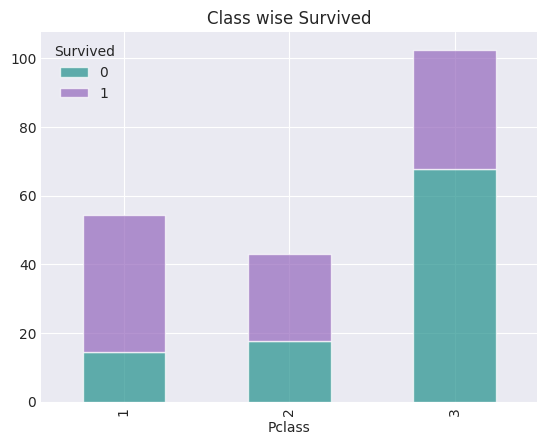

In [165]:
plt.figure(figsize=(10, 6))
survived_vs_pclass.plot(kind='bar',stacked=True,color=[plt.cm.viridis(0.5),'#9467bd'], alpha=0.7)
plt.title('Class wise Survived')
plt.show()

## Survived and Sex
**Conclusions**
- The chance of survived of female is more then a male.

In [65]:
survived_vs_sex = pd.crosstab(df['Sex'],df['Survived'],normalize='columns') * 100
survived_vs_sex

Survived,0,1
Sex,,
female,14.754098,68.128655
male,85.245902,31.871345


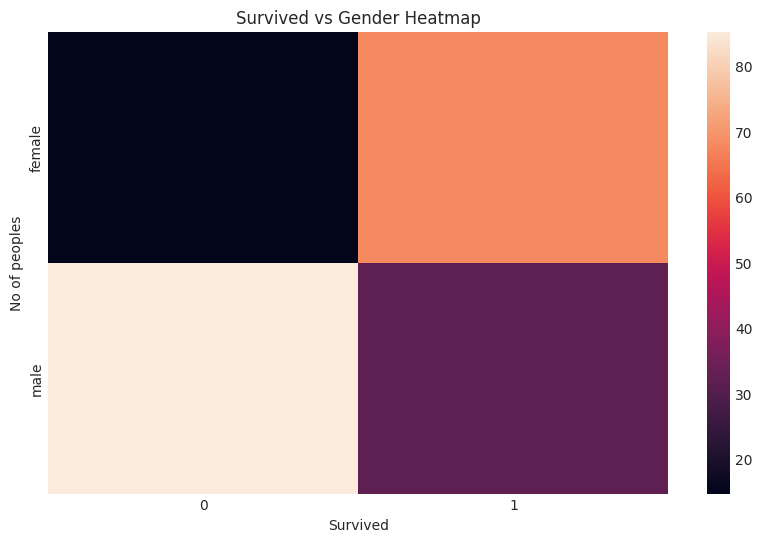

In [166]:
plt.figure(figsize=(10, 6))
sns.heatmap(survived_vs_sex)
plt.ylabel('No of peoples')
plt.title('Survived vs Gender Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

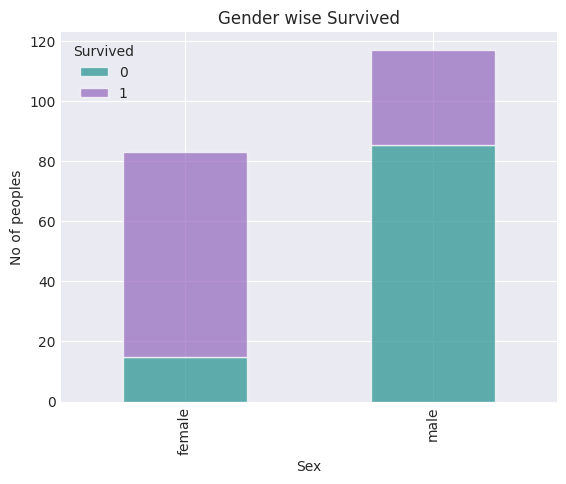

In [167]:
plt.figure(figsize=(10, 6))
survived_vs_sex.plot(kind='bar',stacked=True,color=[plt.cm.viridis(0.5),'#9467bd'], alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Gender wise Survived')
plt.show()

## Survived and Embarked
**Conclusion**
- This is no matter which passinger from which embarked that died but here in C Station peoples are more survived rather then other stations (Q and S). There are two assumptions:
1. May be females are more from Stations C
2. May be more peoples from C in Class 1 (True)

In [68]:
survived_vs_embarked = pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100
survived_vs_embarked

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Figure size 1000x600 with 0 Axes>

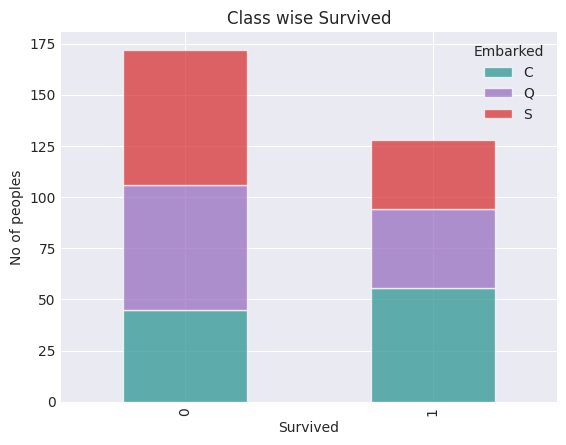

In [168]:
plt.figure(figsize=(10, 6))
survived_vs_embarked.plot(kind='bar',stacked=True,color=[plt.cm.viridis(0.5),'#9467bd','#d62728'], alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Class wise Survived')
plt.show()

In [99]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [100]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


## Survived and Age

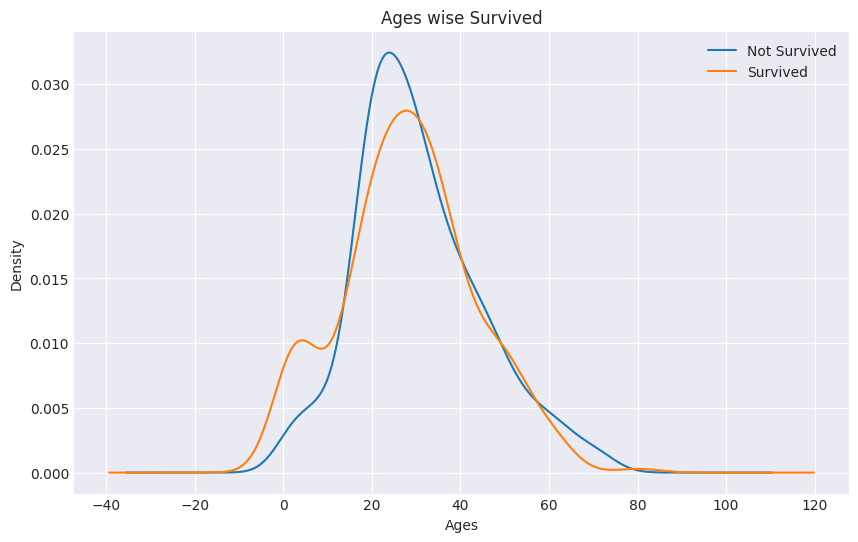

In [169]:
plt.figure(figsize=(10, 6))
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
plt.legend()
plt.xlabel('Ages')
plt.title('Ages wise Survived')
plt.show()

# Feature Engineering

In [73]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [74]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Conclusion**
- Here is mistake because Passenger have 9 family members including itself. But here only 7 show.
- Maybe other family members in test.csv dataframe. (True)

In [76]:
df1 = pd.read_csv('/kaggle/input/titanic/test.csv')

In [77]:
df = pd.concat([df,df1])

In [78]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


**Conclusion**
- The Other family members that are not present in train.csv are present in test.csv.

In [79]:
df['indivisual_fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

In [80]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

**Create Family Type Column**
* if family_size == 1    -> alone
* if family_size == 2-3  -> small
* if family_size > 3     -> large

In [81]:
def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num > 1 and num < 4:
        return 'small'
    else:
        return 'large'

In [82]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [83]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisual_fare,family_size,family_type
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0.0,1,alone


**Make Two New Columns using name Column**
1. Surname
2. Title

In [84]:
df['Surname'] = df['Name'].str.split(',').str.get(0)

In [85]:
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [86]:
df['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [87]:
df['Title']=df['Title'].replace(['Jonkheer.','the','Capt.','Don.','Major.','Col.','Dr.','Rev.'],'Others')

In [88]:
df['Title']=df['Title'].replace({'Mlle.':'Miss.','Mme.':'Mrs.','Done.':'Mrs.'})

In [89]:
df['Title'].value_counts()

Title
Mr.        757
Miss.      262
Mrs.       198
Master.     61
Others      26
Ms.          2
Lady.        1
Sir.         1
Dona.        1
Name: count, dtype: int64

In [90]:
df['Cabin'].isnull().sum()

1014

In [91]:
df['Cabin'] = df['Cabin'].fillna('M')

**Conclusion**
- M will presents missing values 

In [92]:
df['Deck'] = df['Cabin'].str[0]

# EDA After Feature Engineering

In [93]:
# family_vs_survived = pd.crosstab(df['family_type'],df['Survived'],normalize='columns')*100
family_vs_survived=pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100
family_vs_survived

family_type,alone,large,small
Survived,,,
0.0,69.646182,65.934066,43.726236
1.0,30.353818,34.065934,56.273764


<Figure size 1000x600 with 0 Axes>

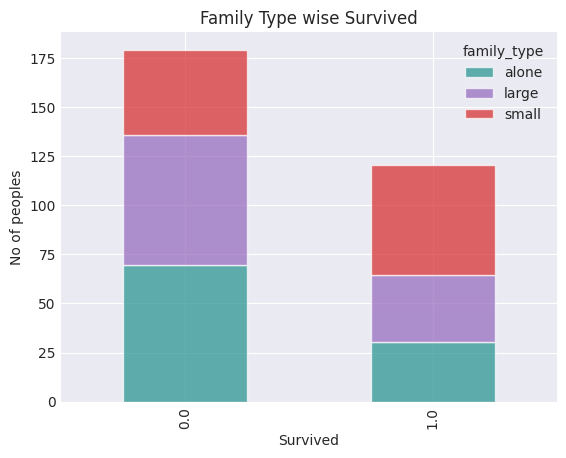

In [170]:
plt.figure(figsize=(10, 6))
family_vs_survived.plot(kind='bar',stacked=True,color=[plt.cm.viridis(0.5),'#9467bd','#d62728'], alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Family Type wise Survived')
plt.show()

In [96]:
title_vs_survived = pd.crosstab(df['Survived'],df['Title'],normalize='columns')*100
title_vs_survived

Title,Lady.,Master.,Miss.,Mr.,Mrs.,Ms.,Others,Sir.
Survived,,,,,,,,
0.0,0.0,42.5,29.891304,84.332689,20.634921,0.0,71.428571,0.0
1.0,100.0,57.5,70.108696,15.667311,79.365079,100.0,28.571429,100.0


<Figure size 1000x600 with 0 Axes>

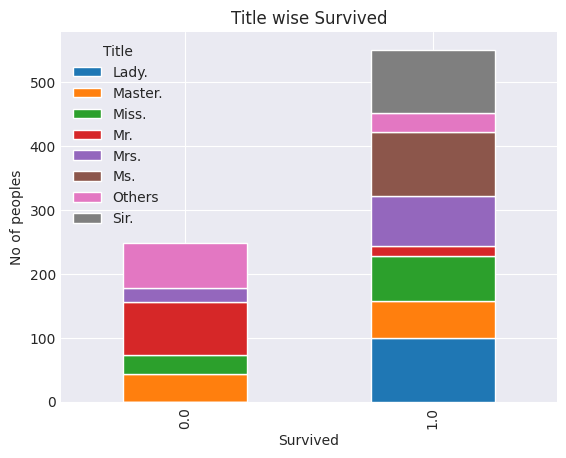

In [171]:
plt.figure(figsize=(10, 6))
title_vs_survived.plot(kind='bar',stacked=True)
plt.ylabel('No of peoples')
plt.title('Title wise Survived')
plt.show()

In [98]:
deck_vs_survived = pd.crosstab(df['Deck'],df['Survived'],normalize='index')*100

<Figure size 1000x600 with 0 Axes>

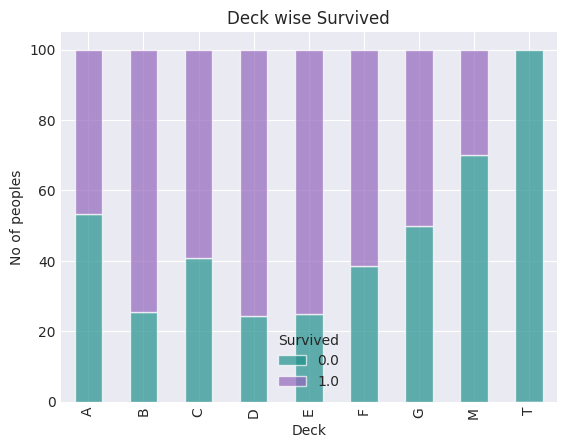

In [172]:
plt.figure(figsize=(10, 6))
deck_vs_survived.plot(kind='bar',stacked=True,color=[plt.cm.viridis(0.5),'#9467bd'], alpha=0.7)
plt.ylabel('No of peoples')
plt.title('Deck wise Survived')
plt.show()

In [184]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisual_fare,family_size,family_type,Surname,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.62500,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.92500,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.,C


<Axes: >

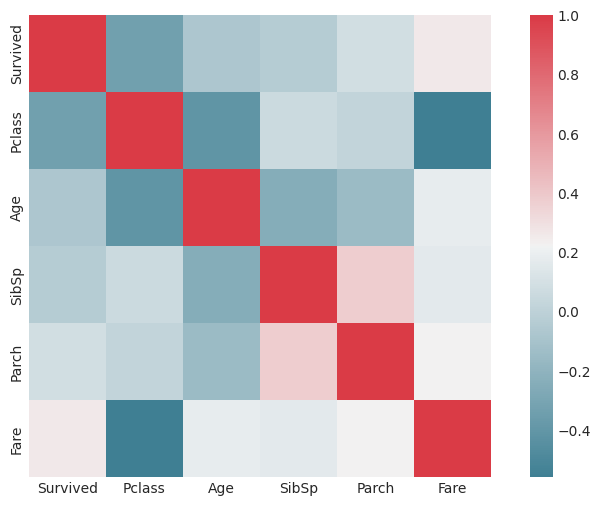

In [189]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)